In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('test_data.csv').dropna()
data = data[(data['Home_Team_Goal'] <= 5) & (data['Away_Team_Goal'] <= 5)]
data.head()

,Home_Team,Away_Team,Home_ELO,Away_ELO,Last_5_Home_Team_avgGoal,Last_5_Away_Team_avgGoal,Last_5_Home_Team_Home_avgGoal,Last_5_Away_Team_Away_avgGoal,Last_5_Home_Team_All_Streak,Last_5_Away_Team_All_Streak,Last_5_Home_Team_Home_Streak,Last_5_Away_Team_Away_Streak,Last_3_same_team_home_goal,Last_3_same_team_away_goal,Last_3_same_team_outcome,Home_Team_Points,Away_Team_Points,Home_Team_Goal,Away_Team_Goal
0,West Bromwich Albion,Man. Utd,75,95,1.0,1.0,1.0,1.0,2.0,-1.0,1.0,0.0,0.000000,0.000000,0,13,7,0,3
2,Chelsea,AFC Bournemouth,94,70,2.2,1.0,2.2,1.0,1.0,2.0,4.0,2.0,0.000000,0.000000,0,41,11,0,3
4,Chelsea,Stoke City,96,78,2.8,1.4,2.8,1.4,3.0,2.0,4.0,1.0,0.000000,0.000000,0,68,42,3,0
5,Arsenal,Queens Park Rangers,93,66,1.8,0.4,1.8,0.4,2.0,5.0,1.0,5.0,0.000000,0.000000,0,15,0,2,1
6,Aston Villa,Crystal Palace,70,74,0.6,0.8,0.6,0.8,-2.0,-1.0,-4.0,1.0,0.333333,0.333333,0,27,9,2,0


In [3]:
le = pickle.load(open('labelencoder.pkl', 'rb'))
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = le.fit_transform(data[i])

In [4]:
X = data.drop(columns=['Home_Team_Goal', 'Away_Team_Goal'])
y1 = data['Home_Team_Goal']
y2 = data['Away_Team_Goal']

In [5]:
X = np.array(X)
y1 = np.array(y1)
y2 = np.array(y2)

## Home Team Goals

In [6]:
AdaBoost_Home = pickle.load(open('AdaBoost_Home.pkl', 'rb'))
DecisionTree_Home = pickle.load(open('DecisionTree_Home.pkl', 'rb'))
GaussianNB_Home = pickle.load(open('GaussianNB_Home.pkl', 'rb'))
KNeighbors_Home = pickle.load(open('KNeighbors_Home.pkl', 'rb'))
LogisticRegression_Home = pickle.load(open('LogisticRegression_Home.pkl', 'rb'))
RandomForest_Home = pickle.load(open('RandomForest_Home.pkl', 'rb'))
SVC_Home = pickle.load(open('SVC_Home.pkl', 'rb'))
XGBClassifier_Home = pickle.load(open('XGBClassifier_Home.pkl', 'rb'))

In [7]:
models = ['AdaBoost', 'DecisionTree', 'GaussianNB', 'KNeighbours', 'LogisticRegression', 'RandomForest', 'SVC', 'XGBClassifier']
f1_scores = []
for model in models:
    if model == 'AdaBoost':
        model = AdaBoost_Home
    elif model == 'DecisionTree':
        model = DecisionTree_Home
    elif model == 'GaussianNB':
        model = GaussianNB_Home
    elif model == 'KNeighbours':
        model = KNeighbors_Home
    elif model == 'LogisticRegression':
        model = LogisticRegression_Home
    elif model == 'RandomForest':
        model = RandomForest_Home
    elif model == 'SVC':
        model = SVC_Home
    elif model == 'XGBClassifier':
        model = XGBClassifier_Home
    y_pred = model.predict(X)
    f1_scores.append(f1_score(y1, y_pred, average='weighted'))

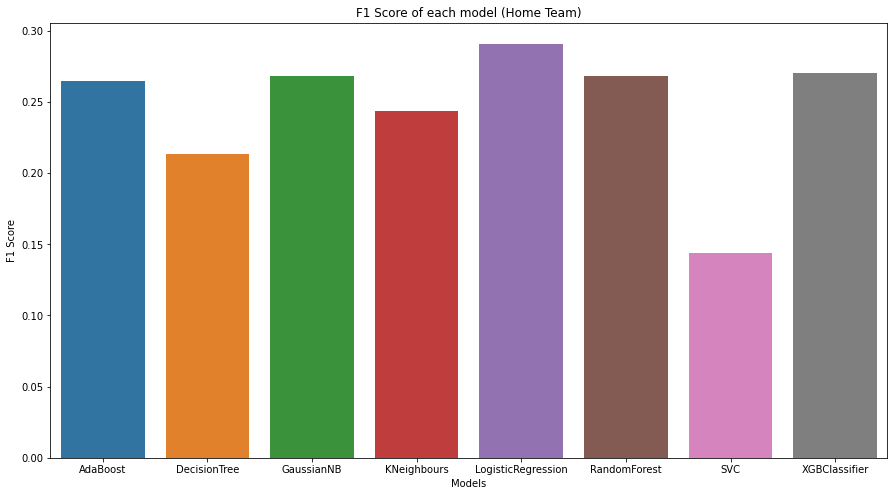

In [8]:
plt.figure(figsize=(15, 8))
plt.bar(models, f1_scores)
sns.barplot(x=models, y=f1_scores)
plt.title('F1 Score of each model (Home Team)')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.show()


In [9]:
accuracy = []
for model in models:
    if model == 'AdaBoost':
        model = AdaBoost_Home
    elif model == 'DecisionTree':
        model = DecisionTree_Home
    elif model == 'GaussianNB':
        model = GaussianNB_Home
    elif model == 'KNeighbours':
        model = KNeighbors_Home
    elif model == 'LogisticRegression':
        model = LogisticRegression_Home
    elif model == 'RandomForest':
        model = RandomForest_Home
    elif model == 'SVC':
        model = SVC_Home
    elif model == 'XGBClassifier':
        model = XGBClassifier_Home
    pred_y = model.predict(X)
    accuracy.append(accuracy_score(y1, pred_y))

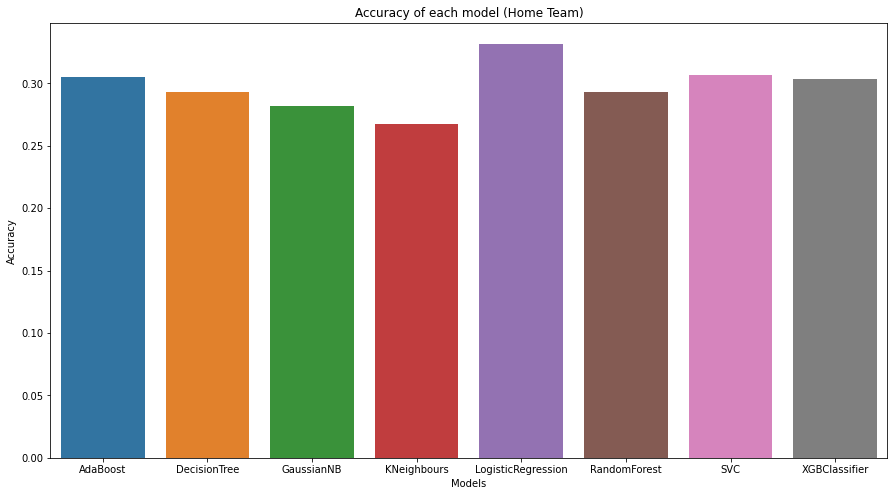

In [10]:
plt.figure(figsize=(15, 8))
plt.bar(models, accuracy)
sns.barplot(x=models, y=accuracy)
plt.title('Accuracy of each model (Home Team)')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [11]:
y_actual_y_pred = []

for model in models:
    if model == 'AdaBoost':
        model = AdaBoost_Home
    elif model == 'DecisionTree':
        model = DecisionTree_Home
    elif model == 'GaussianNB':
        model = GaussianNB_Home
    elif model == 'KNeighbours':
        model = KNeighbors_Home
    elif model == 'LogisticRegression':
        model = LogisticRegression_Home
    elif model == 'RandomForest':
        model = RandomForest_Home
    elif model == 'SVC':
        model = SVC_Home
    elif model == 'XGBClassifier':
        model = XGBClassifier_Home
    pred_y = model.predict(X)
    count = 0
    for i in range(len(pred_y)):
        if pred_y[i] == y1[i]:
            count += 1
    y_actual_y_pred.append(count)
    

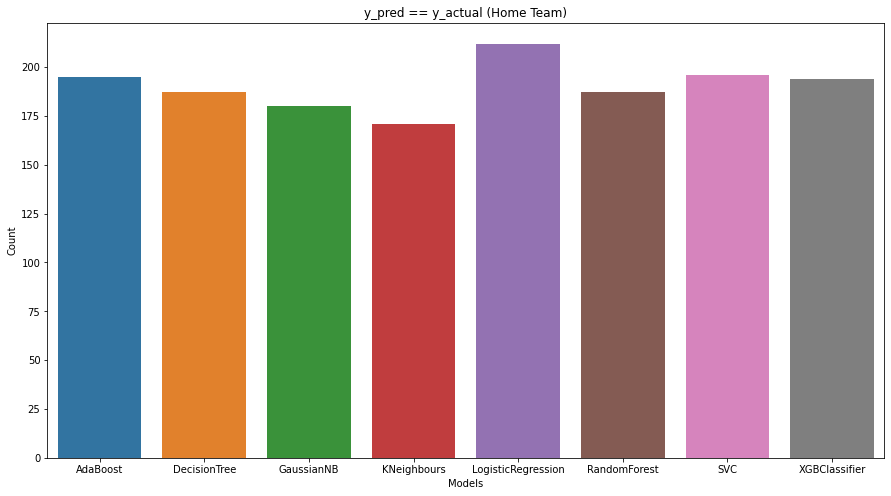

In [12]:
plt.figure(figsize=(15, 8))
sns.barplot(x=models, y=y_actual_y_pred)
plt.title('y_pred == y_actual (Home Team)')
plt.xlabel('Models')
plt.ylabel('Count')
plt.show()

## Away Team Goal

In [13]:
AdaBoost_Away = pickle.load(open('AdaBoost_Away.pkl', 'rb'))
DecisionTree_Away = pickle.load(open('DecisionTree_Away.pkl', 'rb'))
GaussianNB_Away = pickle.load(open('GaussianNB_Away.pkl', 'rb'))
KNeighbors_Away = pickle.load(open('KNeighbors_Away.pkl', 'rb'))
LogisticRegression_Away = pickle.load(open('LogisticRegression_Away.pkl', 'rb'))
RandomForest_Away = pickle.load(open('RandomForest_Away.pkl', 'rb'))
SVC_Away = pickle.load(open('SVC_Away.pkl', 'rb'))
XGBClassifier_Away = pickle.load(open('XGBClassifier_Away.pkl', 'rb'))

In [14]:
models = ['AdaBoost', 'DecisionTree', 'GaussianNB', 'KNeighbours', 'LogisticRegression', 'RandomForest', 'SVC', 'XGBClassifier']
f1_scores = []
for model in models:
    if model == 'AdaBoost':
        model = AdaBoost_Away
    elif model == 'DecisionTree':
        model = DecisionTree_Away
    elif model == 'GaussianNB':
        model = GaussianNB_Away
    elif model == 'KNeighbours':
        model = KNeighbors_Away
    elif model == 'LogisticRegression':
        model = LogisticRegression_Away
    elif model == 'RandomForest':
        model = RandomForest_Away
    elif model == 'SVC':
        model = SVC_Away
    elif model == 'XGBClassifier':
        model = XGBClassifier_Away
    y_pred = model.predict(X)
    f1_scores.append(f1_score(y2, y_pred, average='weighted'))

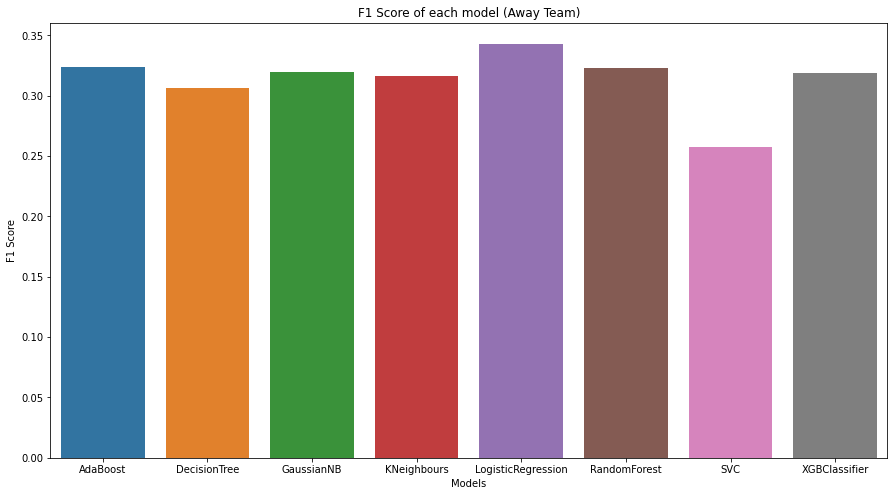

In [15]:
plt.figure(figsize=(15, 8))
plt.bar(models, f1_scores)
sns.barplot(x=models, y=f1_scores)
plt.title('F1 Score of each model (Away Team)')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.show()

In [16]:
accuracy = []
for model in models:
    if model == 'AdaBoost':
        model = AdaBoost_Away
    elif model == 'DecisionTree':
        model = DecisionTree_Away
    elif model == 'GaussianNB':
        model = GaussianNB_Away
    elif model == 'KNeighbours':
        model = KNeighbors_Away
    elif model == 'LogisticRegression':
        model = LogisticRegression_Away
    elif model == 'RandomForest':
        model = RandomForest_Away
    elif model == 'SVC':
        model = SVC_Away
    elif model == 'XGBClassifier':
        model = XGBClassifier_Away
    pred_y = model.predict(X)
    accuracy.append(accuracy_score(y2, pred_y))

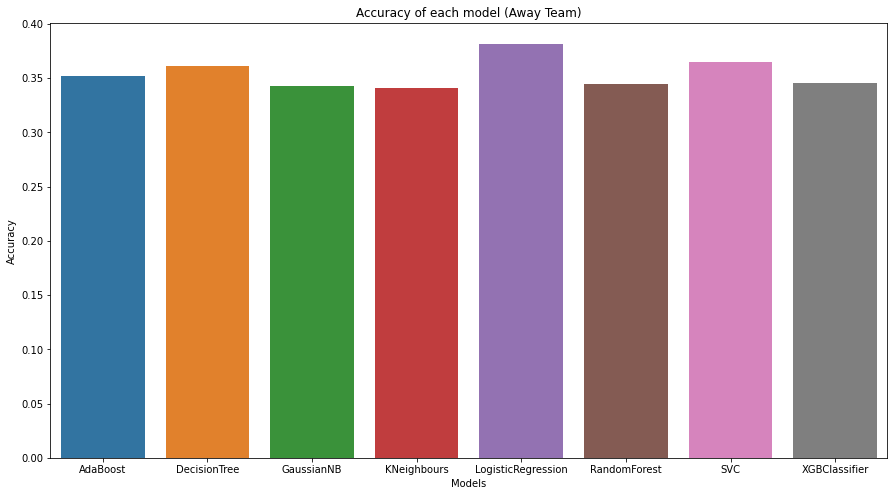

In [17]:
plt.figure(figsize=(15, 8))
plt.bar(models, accuracy)
sns.barplot(x=models, y=accuracy)
plt.title('Accuracy of each model (Away Team)')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [18]:
y_actual_y_pred = []

for model in models:
    if model == 'AdaBoost':
        model = AdaBoost_Away
    elif model == 'DecisionTree':
        model = DecisionTree_Away
    elif model == 'GaussianNB':
        model = GaussianNB_Away
    elif model == 'KNeighbours':
        model = KNeighbors_Away
    elif model == 'LogisticRegression':
        model = LogisticRegression_Away
    elif model == 'RandomForest':
        model = RandomForest_Away
    elif model == 'SVC':
        model = SVC_Away
    elif model == 'XGBClassifier':
        model = XGBClassifier_Away
    pred_y = model.predict(X)
    count = 0
    for i in range(len(pred_y)):
        if pred_y[i] == y2[i]:
            count += 1
    y_actual_y_pred.append(count)
    

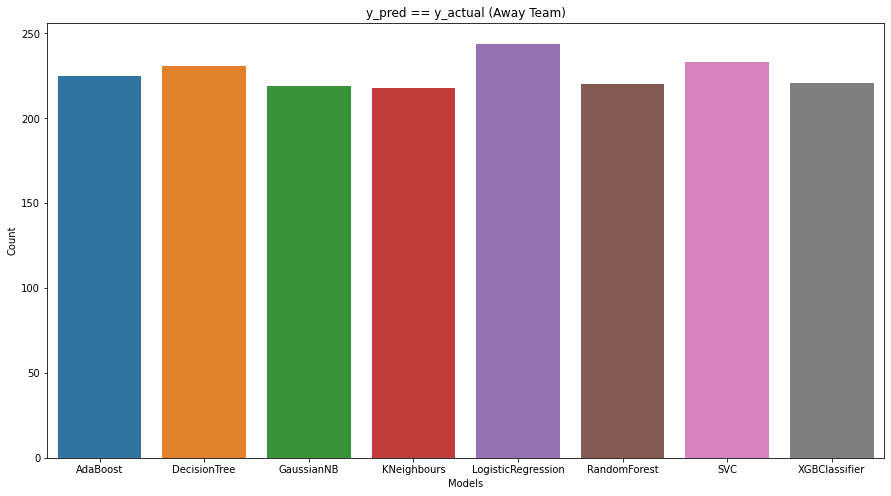

In [19]:
plt.figure(figsize=(15, 8))
sns.barplot(x=models, y=y_actual_y_pred)
plt.title('y_pred == y_actual (Away Team)')
plt.xlabel('Models')
plt.ylabel('Count')
plt.show()